<a href="https://colab.research.google.com/github/AhmadAlabrash/Ro-Deep-Learning/blob/main/RO_DL_Augmntation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import tensorflow as tf
import numpy as np
import PIL
import cv2
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline


In [167]:
url ='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
dir = tf.keras.utils.get_file( origin=url ,cache_dir='.',untar=True)

In [168]:
dir =pathlib.Path('/content/datasets/flower_photos')
dir

PosixPath('/content/datasets/flower_photos')

In [169]:
list(dir.glob('*/*.jpg'))

[PosixPath('/content/datasets/flower_photos/dandelion/2319777940_0cc5476b0d_n.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/7243174412_d3628e4cc4_m.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/3612582808_4503fa1f8b_m.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/2553703483_558d12668c_n.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/14278605962_d3cce5522f.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/19440660848_c789227129_m.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/9029756865_db8891807a_n.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/18803577858_fd0036e1f5_m.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/8707349105_6d06b543b0.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/3418355347_2bdcca592a.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/13807932364_673b7f1c1c_n.jpg'),
 PosixPath('/content/datasets/flower_photos/dandelion/5776879272_95

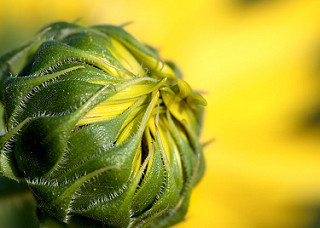

In [170]:
img= PIL.Image.open(list(dir.glob('sunflowers/*.jpg'))[555])
img

In [171]:
flower_images ={
    'sunflowers':list(dir.glob('sunflowers/*.jpg')) ,
    'dandelion':list(dir.glob('dandelion/*.jpg')) ,
    'daisy':list(dir.glob('daisy/*.jpg')) ,
    'roses': list(dir.glob('roses/*.jpg')),
    'tulips': list(dir.glob('tulips/*.jpg'))
}

In [172]:
flower_labels ={
    'sunflowers':0 ,
    'dandelion':1 ,
    'daisy':2 ,
    'roses':3,
    'tulips': 4
}

In [173]:
flower_labels_names =['sunflowers','dandelion','daisy','roses','tulips']
image_shape=(180,180,)

In [174]:
x =[]
y =[]

for i,n in flower_images.items() :
  for image in n:
  
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,image_shape)
  
    x.append(resized_img)
    y.append(flower_labels[i]) 

In [175]:
x = np.array(x)
y = np.array(y)

x = x/255


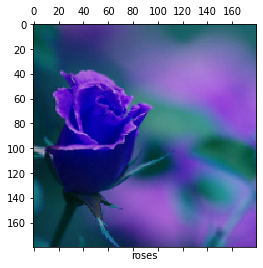

In [176]:
def showimg(i):
  plt.matshow(x[i])
  plt.xlabel(flower_labels_names[y[i]])

showimg(2500)

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.8, random_state=0)

In [178]:
X_train[55]

array([[[0.01176471, 0.18823529, 0.27058824],
        [0.        , 0.14509804, 0.25098039],
        [0.        , 0.14509804, 0.23529412],
        ...,
        [0.01176471, 0.36862745, 0.37254902],
        [0.01176471, 0.33333333, 0.37254902],
        [0.00392157, 0.2745098 , 0.32156863]],

       [[0.        , 0.12156863, 0.21176471],
        [0.00392157, 0.1372549 , 0.21960784],
        [0.        , 0.1372549 , 0.21568627],
        ...,
        [0.00392157, 0.39215686, 0.38823529],
        [0.00392157, 0.34509804, 0.37647059],
        [0.01176471, 0.31372549, 0.34901961]],

       [[0.00392157, 0.11764706, 0.2       ],
        [0.00784314, 0.13333333, 0.20784314],
        [0.00784314, 0.14117647, 0.25098039],
        ...,
        [0.01568627, 0.37647059, 0.39607843],
        [0.00392157, 0.35294118, 0.38431373],
        [0.        , 0.30196078, 0.32941176]],

       ...,

       [[0.01176471, 0.26666667, 0.74117647],
        [0.03137255, 0.29803922, 0.83529412],
        [0.03137255, 0

In [179]:
model = tf.keras.Sequential([
   

    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu' ,input_shape=  (180,180 ,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train ,y_train, 10)

294/294 [==============================] - 182s 615ms/step - loss: 1.3276 - accuracy: 0.4683


In [181]:
model.evaluate(X_test ,y_test)

23/23 [==============================] - 9s 387ms/step - loss: 1.0276 - accuracy: 0.5967


[1.0275747776031494, 0.5967302322387695]

In [184]:
# because our evaluate is low so our model is overfitting 
# we can solve it by droupout and data aogmantation

data_augm = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Rescaling(1./255)
])

In [186]:
model = tf.keras.Sequential([
   
    data_augm,


    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu' ,input_shape=  (180,180 ,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train ,y_train, 10)

294/294 [==============================] - 189s 633ms/step - loss: 1.6530 - accuracy: 0.2204
